# **Homework 2 - Simplified Object Detection**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Homeworks</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*hrXwIJgw51P6p1xJh_IK-g.png" alt="1" border="0">


This notebook contains the required task for the **second homework** of the **Deep Network Development (DNDEG)** course. Read the task description carefully and **fill in the empty code cells**.


# **Task Description**

You are required to **create and train a custom object detection model** to solve a simplified object detection task. Additionally, you will implement the same task using a **pre-trained YOLO model**.  

To achieve this, you will first **generate a synthetic dataset** by placing a specific object onto a set of background images. This dataset will be used for training both models. Since this is a **simplified object detection problem**, each image should contain **only a single object**, ensuring a controlled training environment.  

Your goal is to **train a custom object detection model from scratch** and later **fine-tune a pre-trained YOLO model** using the same dataset.

## **Expectations**

- While **high performance is not expected**, your model should **perform better than random guessing**, and the **loss should consistently decrease across epochs**.  

- You should structure your dataset using the **YOLO format for bounding box regression** (`<class_id> <x_center> <y_center> <width> <height>`), where:

  - `<class_id>` is the object class label (an integer starting from 0).
  - `<x_center>` and `<y_center>` are the normalized coordinates (values between 0 and 1) of the bounding box center.
  - `<width>` and `<height>` are the normalized dimensions (values between 0 and 1) of the bounding box relative to the image size.

ensuring that the same dataset can be seamlessly used for fine-tuning a **pre-trained YOLO model**.

- Your evaluation should include key metrics such as **precision, recall, F1-score, mAP (mean average precision), and IoU (Intersection over Union)**, along with monitoring the overall loss trends throughout training. These metrics should be **visualized using plots and graphs** (e.g., with **matplotlib** or **seaborn**) to illustrate performance over time.  

- To prevent overfitting, you should implement techniques such as **Early Stopping** and ensure that the **best-performing model is saved** during training.  

- For better experiment tracking and visualization, consider using **WandB (Weights and Biases)** or **TensorBoard** to log training progress, performance metrics, and model improvements in real time.  
  
## **Requirements**

You will be required to choose at least three different objects that you would like to run object detection on. For the background images, you are free to use anything thematic and download images utilizing a web crawler. A simple example could be `Waldo`, `Wilma`, and `Wenda`, with the background images being *Where's Waldo?* doodles.

- Data Visualization:
  - Display **your chosen objects with the background removed**.
  - Display **a few of your background images**.
  - Visualize the **synthetic dataset**, where each image should contain a background with an object placed onto it, along with a bounding box and class label.

- Performance Monitoring:
  - **Visualize training and validation losses** (classification loss, regression loss) after training the network.
  - Use **plots and metrics** (e.g., matplotlib, seaborn) to display performance trends.

- Implement overfitting prevention techniques, such as:
  - **Early stopping**
  - **Regularization techniques** (e.g., dropout, weight decay)
  - **Experimenting with different loss functions**
  - Save the **best-performing model** during training.

- Evaluate model performance:
  - **Visualize predictions** on a batch of test images.
  - Calculate **precision, recall, F1-score, mAP, and IoU** for the test dataset.

- Fine-Tuning YOLO:
  - Fine-tune a **YOLO nano** model (**version 5 or later**) on your object detection task.
  - Evaluate model performance using the **same metrics** as before.

- Optionally, use WandB (Weights and Biases) or TensorBoard to:
  - Track and visualize **training progress**.
  - Monitor **model performance** over time.
  - Log **key metrics**.


> **NOTE:** A **multi-shot object detector is unnecessary** since you are dealing with **single-object detection**, for which a simple bounding box regression and classification head will suffice. Implementing `Non-Maximum Suppression` is also **not required** due to the single-object constraint. If you're feeling adventurous, you could extend this homework to multi-object detection using a single-shot approach for a **+1 improvement to your grade**!

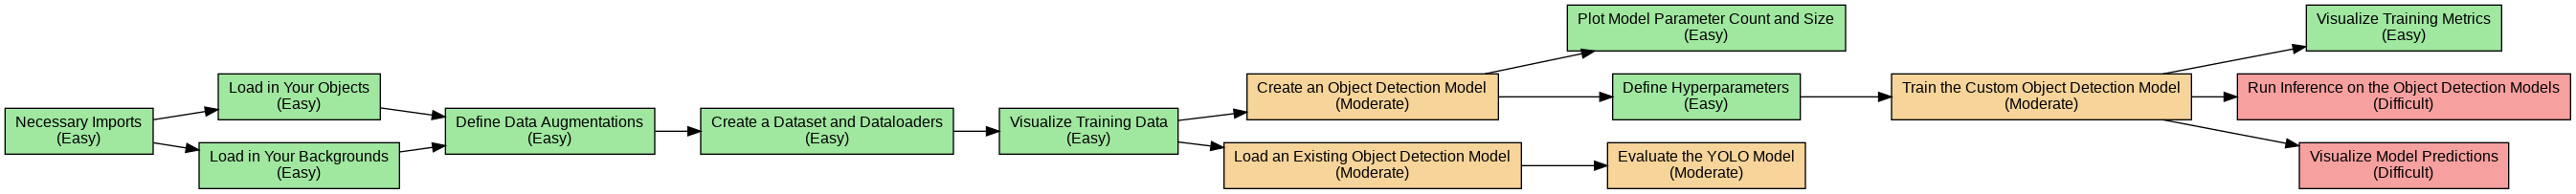

In [ ]:
# @title Custom Object Detection Tasks
# %%capture flowchart_output
# HIDDEN CELL
from graphviz import Digraph
from IPython.display import Image as IMG

def create_flowchart(output_filename='flowchart'):
    dot = Digraph(name='Simplified Object Detection', format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    dot.node('Imports', 'Necessary Imports\n(Easy)', fillcolor='#A0E7A0')

    dot.node('LoadObjects', 'Load in Your Objects\n(Easy)', fillcolor='#A0E7A0')
    dot.node('LoadBackgrounds', 'Load in Your Backgrounds\n(Easy)', fillcolor='#A0E7A0')

    dot.node('AugmentData', 'Define Data Augmentations\n(Easy)', fillcolor='#A0E7A0')
    dot.node('DatasetDataloader', 'Create a Dataset and Dataloaders\n(Easy)', fillcolor='#A0E7A0')

    dot.node('VisualizeSample', 'Visualize Training Data\n(Easy)', fillcolor='#A0E7A0')

    dot.node('CreateModel', 'Create an Object Detection Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('TorchSummary', 'Plot Model Parameter Count and Size\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Hyperparameters', 'Define Hyperparameters\n(Easy)', fillcolor='#A0E7A0')

    dot.node('TrainModel', 'Train the Custom Object Detection Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeTrain', 'Visualize Training Metrics\n(Easy)', fillcolor='#A0E7A0')
    dot.node('RunInference', 'Run Inference on the Object Detection Models\n(Difficult)', fillcolor='#F6A0A0')
    dot.node('VisPred', 'Visualize Model Predictions\n(Difficult)', fillcolor='#F6A0A0')


    dot.node('LoadYOLO', 'Load an Existing Object Detection Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('EvalYOLO', 'Evaluate the YOLO Model\n(Moderate)', fillcolor='#F6D49A')

    # Edges
    dot.edge('Imports', 'LoadObjects')
    dot.edge('Imports', 'LoadBackgrounds')

    dot.edge('LoadObjects', 'AugmentData')
    dot.edge('LoadBackgrounds', 'AugmentData')

    dot.edge('AugmentData', 'DatasetDataloader')

    dot.edge('DatasetDataloader', 'VisualizeSample')

    dot.edge('VisualizeSample', 'CreateModel')

    dot.edge('CreateModel', 'TorchSummary')
    dot.edge('CreateModel', 'Hyperparameters')

    dot.edge('Hyperparameters', 'TrainModel')

    dot.edge('TrainModel', 'VisualizeTrain')
    dot.edge('TrainModel', 'RunInference')
    dot.edge('TrainModel', 'VisPred')

    dot.edge('VisualizeSample', 'LoadYOLO')
    dot.edge('LoadYOLO', 'EvalYOLO')

    dot.render(output_filename, view=False)

create_flowchart('homework2_flowchart')
IMG('homework2_flowchart.png')

Each section of the Notebook will guide you through the task:
- `necessary imports`
- `loading in chosen objects`
- `crawling the web for background images`
- `creating a synthetic dataset`
- `creating dataloaders`
- `visualizing the training data`
- `creating a custom model for object detection`
- `defining a loss function and an optimizer`
- `training and validating the custom model`
- `testing the custom model`
- `fine-tuning a YOLO model`
- `evaluating YOLO results`

The sections are there to guide you but you **do not have to follow them strictly**.

Copy this notebook to your drive (`File -> Save a copy in Drive`), edit it, and upload the final `.ipynb` file to [Canvas](https://canvas.elte.hu). If you are using this in **Google Colab**, save it as `.ipynb` and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the `.ipynb` file.

## **General Rules**
Please check all the requirements listed on **Canvas**, but here are some general rules:

- **No NSFW, inappropriate, offensive, or negative images**. Be creative or use your hobbies as inspiration.
- The model is **not expected to achieve high performance** but must perform better than random guessing.
- Copying others' code will make you fail the assignment automatically, resulting in a **0**.
- Not submitting anything results in a **0**.
- Submitting something, as long as it is not an empty notebook, might result in a 1.
- **Deadline is November 4th Tuesday 11:59 PM** (strict, no late submission)
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your `name` and `Neptun ID` below.

`Good luck!`

## **Guidelines**
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

**Name:** Ferdinand Kulman

**Neptun ID:** YR9905

## **0. Necessary Imports**
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [5]:
import os
import time
import random
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from tqdm import tqdm
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

import torchvision.models as models
import torchvision.transforms as transforms

from ultralytics import YOLO


## **1.1 Object Loading Process**

For this assignment you might choose 3 of the [Where's Wally Characters](https://waldo.fandom.com/wiki/Category:Characters).


<img src='https://kotaksuratriza.wordpress.com/wp-content/uploads/2012/06/wally-and-friends.jpg' />

**Please select 3 or more objects.** After selecting the objects, **remove the background, keeping only the object itself**. You can do this manually, online, or by using code (this step is not part of the assignment evaluation).

As an example, the following objects were chosen (with the background removed using the Segment Anything Model). **Make sure to visualize all of your objects** with `Matplotlib` or `Seaborn`!

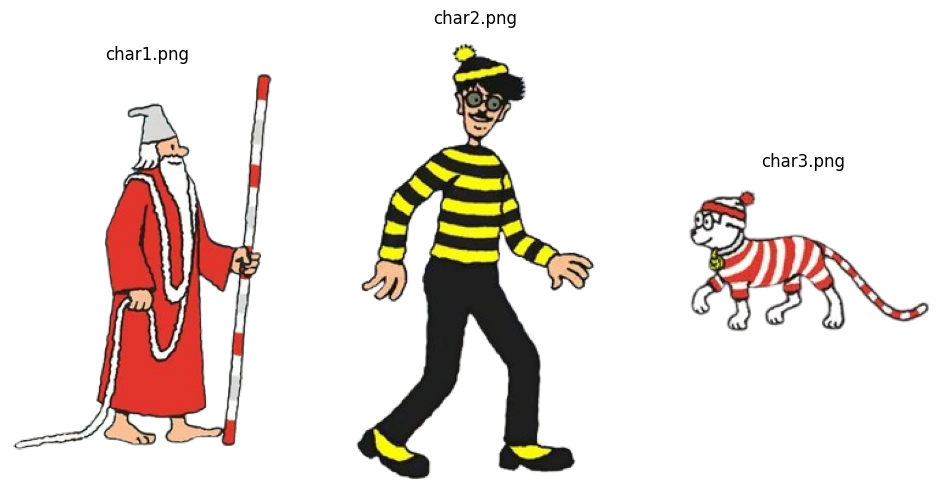

In [4]:
from PIL import Image

directory = './figures'

def display_figures(directory):
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    for i, filename in enumerate(os.listdir(directory)[:3]):
        image = Image.open(os.path.join(directory, filename))
        axes[i].imshow(image)
        axes[i].set_title(filename)
        axes[i].axis('off')
    plt.show()
    pass

display_figures(directory)

## **1.2 Crawling the Web for Background Images**

To train a custom object detection model, a dataset is required. For this assignment, you will create a **synthetic dataset** by:  

- **Placing a single object at a random position** on a background image.  

The goal is to follow a similar approach to **Where’s Waldo doodles** by embedding objects into cluttered backgrounds. **Therefore, gather a selection of background images from various doodles.** This can be done manually or programmatically.  

To automate image collection, it is recommended to use `icrawler`. [Documentation](https://icrawler.readthedocs.io/en/latest/)

In [5]:
!pip install icrawler

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ----------------------- ---------------- 2.4/4.0 MB 13.4 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 14.1 MB/s  0:00:00

   ---------------------------------------- 0/3 [lxml]
   ---------------------------------------- 0/3 [lxml]
   ---------------------------------------- 0/3 [lxml]
   -------------------------- ------------- 2/3 [icrawler]
   -------------------------- ------------- 2/3 [icrawler]
   -------------------------- ------------- 2/3 [icrawler]
   ---------------------------------------- 3/3 [icrawler]




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!mkdir background

In case of any **errors, try using a different crawler**. You can use one of the following options:

```python
from icrawler.builtin import BaiduImageCrawler, BingImageCrawler, GoogleImageCrawler


In [11]:
from icrawler.builtin import GoogleImageCrawler

google_crawler = GoogleImageCrawler(
    parser_threads=2,
    downloader_threads=4,
    storage={'root_dir': 'background'}
)

for keyword in ['doodle background', 'cluttered doodle background', 'colorful doodle background', 'waldo doodle background']:
    google_crawler.crawl(
        keyword=keyword, max_num=100, file_idx_offset='auto')

# Some images may return an error, but icrawler tries to find other images regardless

2025-10-27 11:27:30,375 - INFO - icrawler.crawler - start crawling...
2025-10-27 11:27:30,376 - INFO - icrawler.crawler - starting 1 feeder threads...
2025-10-27 11:27:30,377 - INFO - feeder - thread feeder-001 exit
2025-10-27 11:27:30,378 - INFO - icrawler.crawler - starting 2 parser threads...
2025-10-27 11:27:30,380 - INFO - icrawler.crawler - starting 4 downloader threads...
2025-10-27 11:27:31,541 - INFO - parser - parsing result page https://www.google.com/search?q=doodle+background&ijn=0&start=0&tbs=&tbm=isch
2025-10-27 11:27:32,151 - INFO - downloader - image #1	https://cdn.pixabay.com/photo/2020/10/14/16/14/space-5654794_1280.png
2025-10-27 11:27:32,193 - INFO - downloader - image #2	https://img.freepik.com/free-vector/blue-background-white-doodles-set_78370-3164.jpg
2025-10-27 11:27:32,235 - INFO - downloader - image #3	https://img.freepik.com/free-vector/hand-drawn-doodle-background_23-2149973179.jpg
2025-10-27 11:27:32,260 - ERROR - downloader - Response status code 400, fi

Make sure to **visualize a small subset of the background images as well**!
```python
def display_sample_images(directory):
  raise NotImplementedError
```

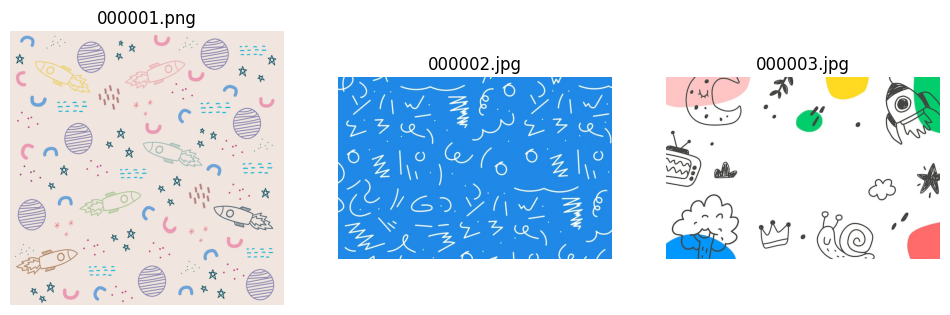

In [12]:
directory = 'background'

def display_sample_images(directory):
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    for i, filename in enumerate(os.listdir(directory)[:3]):
        image = Image.open(os.path.join(directory, filename))
        axes[i].imshow(image)
        axes[i].set_title(filename)
        axes[i].axis('off')
    plt.show()
    pass

display_sample_images(directory)

## **2. Creating a Synthetic Dataset**

This is a crucial part of the assignment evaluation. Using the selected objects and collected background images, follow these steps to generate your dataset:  

1. **Randomly select background images** from your dataset.  
2. **Place a single object** from your selected set into each background image at a **random location**.  
3. **Record the object's coordinates** and create a corresponding bounding box. The format should be:  
   - If an object with height $h$ and width $w$ is positioned at $(x, y)$, the bounding box should follow:  
     $$ [x_{\text{center}}, y_{\text{center}}, \text{width}, \text{height}] $$  
   - Normalize the values using:  
     $$ \left[\frac{x + w/2}{\text{image width}}, \frac{y + h/2}{\text{image height}}, \frac{w}{\text{image width}}, \frac{h}{\text{image height}}\right] $$  
     where *image* refers to the background image dimensions.  
4. **Save the generated dataset**, as it will be used for training both your custom model and fine-tuning an existing object detection model.  
5. **Wrap the dataset creation** within a PyTorch `Dataset` class for seamless data handling and model training.  
6. **Split the dataset** into training, validation, and test sets to ensure proper model evaluation.
7. **Apply various transformations** on the training and validation datasets. Only apply **tensor conversion and normalization** on the test set.

<img src="https://i.ibb.co/XrHqLmz4/2.png" alt="2" border="0">

```python
def createDataset(root_dir, dataset_name, split, img_size, num_images):
    #This my own function... It creates and saves a dataset in the following format:
    # root/
    #     dataset/
    #             train/
    #                   images/
    #                         00001.jpg
    #                   labels/
    #                         00001.txt with the content [class yolo_x, yolo_y, yolo_w, yolo_h] following the yolo format
    #             val
    #...
    # ADD YOUR CODE HERE
    raise NotImplementedError

createDataset('dataset', 'background', split='train', img_size=(640,640), num_images=5000)
createDataset('dataset', 'background', split='val', img_size=(640,640), num_images=1000)
createDataset('dataset', 'background', split='test', img_size=(640,640), num_images=200)
```

```python
class ObjectDetectionDataset(Dataset):
    def __init__(self, root_dir, split, num_classes, transform):
        raise NotImplementedError
    def __len__(self):
        raise NotImplementedError
    def __getitem__(self, idx):
        raise NotImplementedError
```

In [16]:
def create_dataset(root_dir, split, img_size, num_images):
    split_dir = os.path.join(root_dir, split)
    images_dir = os.path.join(split_dir, "images")
    labels_dir = os.path.join(split_dir, "labels")

    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)

    bg_images = os.listdir("background")
    obj_images = [f for f in os.listdir("figures") if os.path.isfile(os.path.join("figures", f))]

    obj_map = { name: i for i, name in enumerate(obj_images)}

    for i in range(num_images):
        bg_image_path = os.path.join("background", random.choice(bg_images))
        bg_image = Image.open(bg_image_path).convert("RGBA").resize(img_size)

        obj_size = random.randint(100, 200)
        obj_size = (obj_size, obj_size)
        obj_image_name = random.choice(obj_images)
        obj_image_path = os.path.join("figures", obj_image_name)
        obj_index = obj_map[obj_image_name]
        obj_image = Image.open(obj_image_path).convert("RGBA").resize(obj_size)

        px = random.randint(0, img_size[0] - obj_size[0])
        py = random.randint(0, img_size[1] - obj_size[1])
        bx = (px + obj_size[0] / 2) / img_size[0]
        by = (py + obj_size[1] / 2) / img_size[1]
        bw = obj_size[0] / img_size[0]
        bh = obj_size[1] / img_size[1]

        bg_image.paste(obj_image, (px, py), obj_image)

        out_image_path = os.path.join(images_dir, f"{i:05d}.png")
        bg_image.save(out_image_path)

        label_path = os.path.join(labels_dir, f"{i:05d}.txt")
        with open(label_path, "w") as label:
            label.write(f"{obj_index} {bx} {by} {bw} {bh}")

create_dataset("dataset", "train", (512, 512), 1500)
create_dataset("dataset", "val", (512, 512), 500)
create_dataset("dataset", "test", (512, 512), 100)

In [19]:
class ObjectDetectionDataset(Dataset):
    def __init__(self, root_dir, split='train', num_classes=3, transform=None):
        self.root_dir = root_dir
        self.split_dir = os.path.join(root_dir, split)
        self.image_dir = os.path.join(self.split_dir, 'images')
        self.label_dir = os.path.join(self.split_dir, 'labels')
        self.image_filenames = sorted(os.listdir(self.image_dir))
        self.transform = transform
        self.num_classes = num_classes

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):

        img_name = self.image_filenames[idx]
        img_path = os.path.join(self.image_dir, img_name)
        label_path = os.path.join(self.label_dir, img_name.replace('.png', '.txt'))

        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        bbox_list = []
        with open(label_path, 'r') as file:
            for line in file:
                parts = line.strip().split()
                class_id = int(parts[0])
                bbox = [float(coord) for coord in parts[1:]]
                bbox_list.append((class_id, bbox))

        labels = [item[0] for item in bbox_list]
        bboxes = [item[1] for item in bbox_list]

        return image, torch.tensor(labels, dtype=torch.long), torch.tensor(bboxes, dtype=torch.float32)



## **3. Creating Dataloaders**

For the **DataLoader**, ensure that the **batch size** is appropriate so that it fits into memory. Set the **`shuffle`** parameter as follows:

- **Training & Validation DataLoaders:** `shuffle=True` (to randomize the order of samples)  
- **Test DataLoader:** `shuffle=False` (to maintain consistency in evaluation)

In [20]:
root_dir = 'dataset'

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = ObjectDetectionDataset(
    root_dir=root_dir,
    split='train',
    transform=transform
)

val_dataset = ObjectDetectionDataset(
    root_dir=root_dir,
    split='val',
    transform=transform
)

test_dataset = ObjectDetectionDataset(
    root_dir=root_dir,
    split='test',
    transform=transform
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=0,
    pin_memory=True
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=16,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=16,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)


## **4. Visualizing the Training Data**

To visualize the training data, extract a batch from the training `DataLoader` and plot the **input images with their respective bounding box and class label** using `Matplotlib` or `Seaborn`. Ensure that at least **8 datapoints** are displayed for a clear representation.

```python
def visualize_batch():
  raise NotImplementedError
```

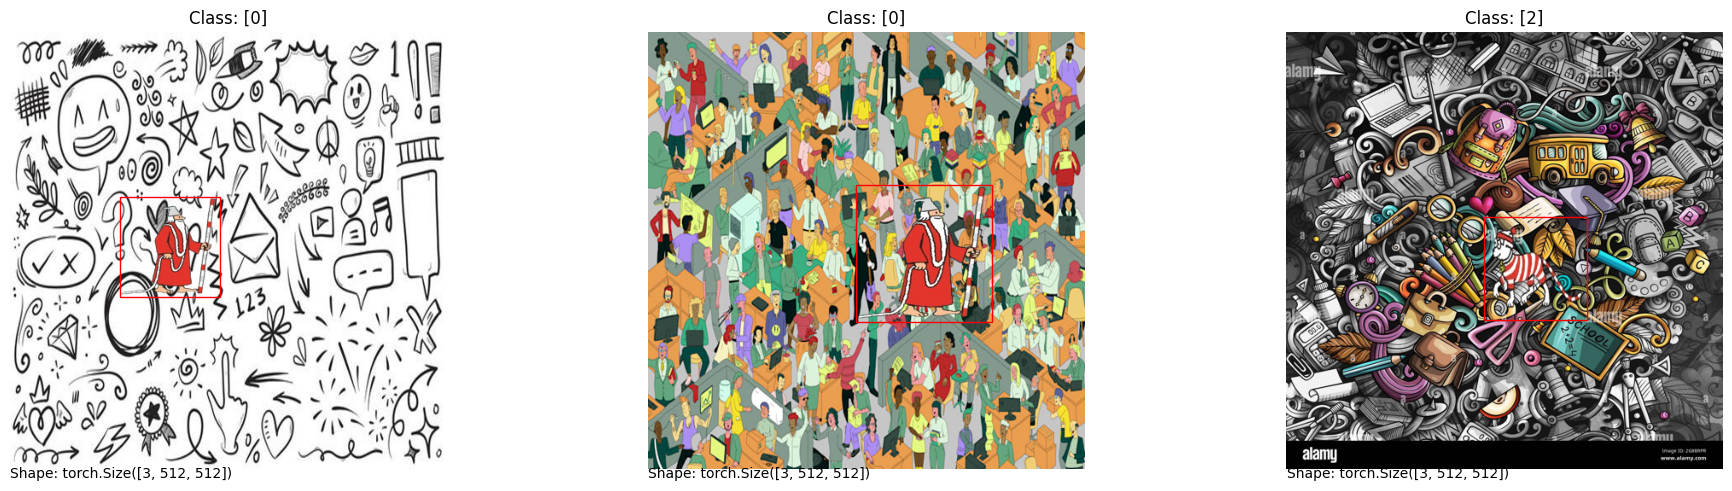

In [21]:
def visualize_dataset(dataset, sample_size=3):
    fig, axes = plt.subplots(1, sample_size, figsize=(20, 5))
    random_indices = random.sample(range(len(dataset)), sample_size)

    for i, idx in enumerate(random_indices):
        image, labels, bbox_list = dataset[idx]
        axes[i].imshow(image.permute(1, 2, 0))


        for bbox_item in bbox_list:
            bbox_x, bbox_y, bbox_w, bbox_h = bbox_item.tolist()

            bbox_x *= image.shape[2]
            bbox_y *= image.shape[1]
            bbox_w *= image.shape[2]
            bbox_h *= image.shape[1]

            rect = patches.Rectangle(
                (bbox_x - bbox_w / 2, bbox_y - bbox_h / 2),
                bbox_w, bbox_h,
                linewidth=1, edgecolor='r', facecolor='none'
            )
            axes[i].add_patch(rect)

        axes[i].set_title(f'Class: {labels.tolist()}')
        axes[i].axis('off')


        axes[i].text(0, image.shape[1] + 10, f'Shape: {image.shape}', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

visualize_dataset(train_dataset)


## **5. Creating a Custom Object Detection Model**

In this assignment, you are tasked with building your own custom object detection model.

Design a CNN-based architecture that includes a **backbone for feature extraction** and **two output branches**:

- One for **class probabilities** (with output size equal to the number of object classes, e.g., 3).
- Another for **bounding box regression** (with size 4 for the box coordinates: $[x_{center}, y_{center}, width, height]$).

This is the **core evaluation of the assignment**. Experiment with different layers, hyperparameters, and regularization techniques to optimize the model's performance.

> **Note**: You **ARE** allowed to use a pre-trained backbone (`VGG`, `ResNet`) for this task. You are free to fine-tune the pre-trained backbone or just freeze is completely.

```python
class CustomModel(nn.Module):
    def __init__(self, num_classes=3):
        super(CustomModel, self).__init__()
        raise NotImplementedError

    def forward(self, x):
        raise NotImplementedError
```

In [28]:
# --- Model -----------------------------------------------------------
class CustomModel(nn.Module):

    def __init__(self, num_classes=3, pretrained=True):
        super(CustomModel, self).__init__()
        backbone = models.resnet18(pretrained=pretrained)
        # remove final fc
        self.features = nn.Sequential(
            backbone.conv1,
            backbone.bn1,
            backbone.relu,
            backbone.maxpool,
            backbone.layer1,
            backbone.layer2,
            backbone.layer3,
            backbone.layer4,
            backbone.avgpool  # output will be (B, 512, 1, 1)
        )
        feat_dim = backbone.fc.in_features  # 512 for resnet18
        # small head MLPs
        self.cls_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(feat_dim, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )
        self.bbox_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(feat_dim, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 4),
            nn.Sigmoid()  # normalized outputs 0..1: cx,cy,w,h
        )

    def forward(self, x):
        x = self.features(x)             # (B, C, 1, 1)
        cls = self.cls_head(x)           # (B, num_classes)
        bbox = self.bbox_head(x)         # (B, 4) normalized
        return cls, bbox

# --- Helpers ---------------------------------------------------------
def cxcywh_to_xyxy(boxes):
    # boxes: (N,4) cx,cy,w,h normalized
    cx, cy, w, h = boxes.unbind(dim=1)
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    return torch.stack([x1, y1, x2, y2], dim=1)

def iou_tensor(pred_boxes, gt_boxes, eps=1e-6):
    # boxes in normalized xyxy (N,4)
    # assume pred_boxes and gt_boxes are same length N
    p = pred_boxes
    g = gt_boxes
    x1 = torch.max(p[:,0], g[:,0])
    y1 = torch.max(p[:,1], g[:,1])
    x2 = torch.min(p[:,2], g[:,2])
    y2 = torch.min(p[:,3], g[:,3])
    inter_w = (x2 - x1).clamp(min=0)
    inter_h = (y2 - y1).clamp(min=0)
    inter = inter_w * inter_h
    area_p = (p[:,2]-p[:,0]).clamp(min=0) * (p[:,3]-p[:,1]).clamp(min=0)
    area_g = (g[:,2]-g[:,0]).clamp(min=0) * (g[:,3]-g[:,1]).clamp(min=0)
    union = area_p + area_g - inter + eps
    return inter / union

# --- Training / Validation Loop -------------------------------------
def train_one_epoch(model, loader, optimizer, device, cls_loss_fn, bbox_loss_fn):
    model.train()
    total_loss = 0.0
    total_cls = 0.0
    total_bbox = 0.0
    iou_accum = 0.0
    n = 0
    pbar = tqdm(loader, desc="train", leave=False)
    for images, labels, bboxes in pbar:
        images = images.to(device)
        labels = labels.to(device)
        bboxes = bboxes.to(device)

        # ASSUMPTION: one object per image -> use first element
        # labels: (B, ) or (B, 1). If shape != (B,) adjust
        if labels.dim() > 1:
            labels = labels[:,0]
        if bboxes.dim() > 2:
            bboxes = bboxes[:,0,:]

        optimizer.zero_grad()
        cls_logits, pred_bbox = model(images)  # cls_logits (B,C), pred_bbox (B,4)

        cls_loss = cls_loss_fn(cls_logits, labels)
        bbox_loss = bbox_loss_fn(pred_bbox, bboxes)
        loss = cls_loss + 10.0 * bbox_loss  # balance; weight bbox stronger (tune)

        loss.backward()
        optimizer.step()

        total_loss += loss.item() * images.size(0)
        total_cls += cls_loss.item() * images.size(0)
        total_bbox += bbox_loss.item() * images.size(0)

        # IoU
        pred_xyxy = cxcywh_to_xyxy(pred_bbox)
        gt_xyxy = cxcywh_to_xyxy(bboxes)
        iou = iou_tensor(pred_xyxy, gt_xyxy).sum().item()
        iou_accum += iou
        n += images.size(0)

        pbar.set_postfix({"loss": loss.item(), "cls": cls_loss.item(), "bbox": bbox_loss.item(), "iou": iou_accum / n})

    return total_loss / n, total_cls / n, total_bbox / n, iou_accum / n

def validate(model, loader, device, cls_loss_fn, bbox_loss_fn):
    model.eval()
    total_loss = 0.0
    total_cls = 0.0
    total_bbox = 0.0
    iou_accum = 0.0
    n = 0
    with torch.no_grad():
        pbar = tqdm(loader, desc="val", leave=False)
        for images, labels, bboxes in pbar:
            images = images.to(device)
            labels = labels.to(device)
            bboxes = bboxes.to(device)

            if labels.dim() > 1:
                labels = labels[:,0]
            if bboxes.dim() > 2:
                bboxes = bboxes[:,0,:]

            cls_logits, pred_bbox = model(images)

            cls_loss = cls_loss_fn(cls_logits, labels)
            bbox_loss = bbox_loss_fn(pred_bbox, bboxes)
            loss = cls_loss + 10.0 * bbox_loss

            total_loss += loss.item() * images.size(0)
            total_cls += cls_loss.item() * images.size(0)
            total_bbox += bbox_loss.item() * images.size(0)

            pred_xyxy = cxcywh_to_xyxy(pred_bbox)
            gt_xyxy = cxcywh_to_xyxy(bboxes)
            iou_accum += iou_tensor(pred_xyxy, gt_xyxy).sum().item()
            n += images.size(0)

            pbar.set_postfix({"val_loss": loss.item(), "iou": iou_accum / n})

    return total_loss / n, total_cls / n, total_bbox / n, iou_accum / n


## **6.1 Plotting Model Parameter Count and Size**

A convenient way to inspect the number of parameters in a defined `nn.Module` is by using the `torchsummary` package. This package provides a detailed summary of the model architecture, including the number of parameters in each layer, their shapes, and the total parameter count.

To use `torchsummary`, you need to pass a dummy tensor with the specified input shape. The package will then traverse the model, layer by layer, calculating the total number of trainable and non-trainable parameters while also displaying the output shapes at each stage.

Sumnmarize **both models**!

```python
model = CustomModel().to(device)
summary(model, input_size = )
```

In [29]:
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example 1: Simple custom CNN model (if you have one)
simple_model = CustomModel(num_classes=3, pretrained=False).to(device)
summary(simple_model, input_size=(3, 512, 512))

# Example 2: ResNet-based custom model
resnet_model = CustomModel(num_classes=3, pretrained=True).to(device)
summary(resnet_model, input_size=(3, 512, 512))


E:\Programok\python\dnd\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
E:\Programok\python\dnd\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           9,408
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
         MaxPool2d-4         [-1, 64, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          36,864
       BatchNorm2d-6         [-1, 64, 128, 128]             128
              ReLU-7         [-1, 64, 128, 128]               0
            Conv2d-8         [-1, 64, 128, 128]          36,864
       BatchNorm2d-9         [-1, 64, 128, 128]             128
             ReLU-10         [-1, 64, 128, 128]               0
       BasicBlock-11         [-1, 64, 128, 128]               0
           Conv2d-12         [-1, 64, 128, 128]          36,864
      BatchNorm2d-13         [-1, 64, 128, 128]             128
             ReLU-14         [-1, 64, 1

E:\Programok\python\dnd\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           9,408
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
         MaxPool2d-4         [-1, 64, 128, 128]               0
            Conv2d-5         [-1, 64, 128, 128]          36,864
       BatchNorm2d-6         [-1, 64, 128, 128]             128
              ReLU-7         [-1, 64, 128, 128]               0
            Conv2d-8         [-1, 64, 128, 128]          36,864
       BatchNorm2d-9         [-1, 64, 128, 128]             128
             ReLU-10         [-1, 64, 128, 128]               0
       BasicBlock-11         [-1, 64, 128, 128]               0
           Conv2d-12         [-1, 64, 128, 128]          36,864
      BatchNorm2d-13         [-1, 64, 128, 128]             128
             ReLU-14         [-1, 64, 1

In [30]:
def count_parameters(model):
    trainable = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total = sum(p.numel() for p in model.parameters())
    print(f"Total params: {total:,} | Trainable: {trainable:,}")

count_parameters(resnet_model)


Total params: 11,440,967 | Trainable: 11,440,967


## **6.2 Defining Loss Function and Optimizer**

**Loss Functions and their options:**

For our custom object detection task, we are performing both **regression** (for bounding box coordinates) and **classification** (for object categories). Our network predicts **continuous** bounding box values, along with a **discrete** class label, meaning that our chosen loss function should effectively be a composite of two losses:  

1. **A regression loss** for bounding box prediction.  
2. **A classification loss** for object label prediction.  

Here are some common loss functions that can be used:  

---

### **a. Mean Squared Error (MSE) Loss** (Bounding Box Regression)  
MSE loss is a standard choice for regression tasks, as it penalizes larger errors more strongly than smaller ones. For bounding box prediction, this ensures that predicted box coordinates are as close as possible to the ground truth.  

$$
\mathcal{L}_{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$  

where $ y_i $ is the ground truth bounding box coordinate and $ \hat{y}_i $ is the predicted coordinate.  

- **Pros:** Simple, computationally efficient, commonly used in regression tasks.  
- **Cons:** Sensitive to outliers since it squares errors, which may cause instability when predicting bounding boxes.  

---

### **b. Cross-Entropy Loss (Classification Loss)**  
For predicting object classes, **Cross-Entropy Loss** is the most commonly used loss function in classification tasks. It is defined as:  

$$
\mathcal{L}_{CE} = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$  

where $ C $ is the total number of object classes, $ y_i $ is the ground truth label (one-hot encoded), and $ \hat{y}_i $ is the predicted probability for that class.  

- **Pros:** Standard for classification, provides well-calibrated probabilities.  
- **Cons:** Can be affected by class imbalances; label smoothing or weighted loss may be needed.  

---

### **c. Huber Loss (Smooth Bounding Box Regression Loss)**  
Huber Loss is an improvement over MSE that reduces sensitivity to outliers. It applies MSE for small errors and Mean Absolute Error (MAE) for larger errors:  

$$
\mathcal{L}_{Huber} =
\begin{cases}
\frac{1}{2} (y_i - \hat{y}_i)^2, & \text{if} \ |y_i - \hat{y}_i| \leq \delta \\
\delta (|y_i - \hat{y}_i| - \frac{1}{2} \delta), & \text{otherwise}
\end{cases}
$$  

where $ \delta $ is a threshold that determines when the loss transitions from quadratic to linear.  

- **Pros:** More robust than MSE, reduces the effect of outliers on bounding box predictions.  
- **Cons:** Requires tuning of $ \delta $ for optimal performance.  

---

### **d. Intersection over Union (IoU) Loss (Bounding Box Alignment Loss)**  
IoU Loss directly optimizes the overlap between the predicted and ground-truth bounding boxes:  

$$
\mathcal{L}_{IoU} = 1 - \frac{\text{Intersection Area}}{\text{Union Area}}
$$  

This loss ensures that the model prioritizes bounding box alignment rather than just minimizing coordinate differences.  

- **Pros:** More appropriate for object detection since it directly optimizes box overlap.  
- **Cons:** Harder to optimize, as gradients may vanish when boxes do not overlap.  

---

[PyTorch Documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

---

**Optimizers and their options:**

There are some pre-built [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html), they are sufficient in most cases, especially if their parameters are well set. The two most well-known are Adam (AdamW) and SGD, both of which originate from Gradient Descent, which we implemented earlier.

* **S**tochastic **G**radient **D**escent ([SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html))
* **ADA**ptive **M**oment optimizer ([ADAM](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html))
* [A good general overview](https://www.ruder.io/optimizing-gradient-descent/)

In [31]:
import torch.nn as nn
import torch.optim as optim

# Classification: CrossEntropyLoss (discrete class labels)
cls_loss_fn = nn.CrossEntropyLoss()

# Bounding box: SmoothL1Loss (Huber) or MSELoss
bbox_loss_fn = nn.SmoothL1Loss()  # robust alternative to MSELoss

# Optimizer: Adam or SGD
optimizer = optim.Adam(resnet_model.parameters(), lr=1e-4, weight_decay=1e-5)

# Optional: learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.5)


## **7. Training the Custom Object Detection Model**

When implementing the training loop, ensure the following key aspects are included:

- Set an **appropriate number of epochs** for model training, balancing between underfitting and overfitting.
- Maintain running losses throughout each epoch and compute both **training losses** and **validation losses** per epoch.
- Implement an **early stopping mechanism** to halt training if validation loss stops improving, preventing unnecessary overfitting.
- **Save the model at its best-performing epoch** based on validation loss, ensuring the best version is retained for inference.
- Ensure you're optimizing both **classification loss** and **bounding box regression loss**.

In [39]:
import copy
from tqdm import tqdm
import torch

def train_model(
    model, train_loader, val_loader, cls_loss_fn, bbox_loss_fn,
    optimizer, scheduler, device, num_epochs=20, patience=5
):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = float('inf')
    patience_counter = 0

    # 🔹 initialize tracking lists
    train_losses, val_losses = [], []
    train_cls_losses, val_cls_losses = [], []
    train_bbox_losses, val_bbox_losses = [], []

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print("-" * 30)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = train_loader
            else:
                model.eval()
                dataloader = val_loader

            running_loss = 0.0
            running_cls_loss = 0.0
            running_bbox_loss = 0.0
            total_samples = 0

            for images, labels, bboxes in tqdm(dataloader, desc=phase):
                images, labels, bboxes = images.to(device), labels.to(device), bboxes.to(device)

                # flatten batch targets if needed
                if labels.dim() > 1:
                    labels = labels[:, 0]
                if bboxes.dim() > 2:
                    bboxes = bboxes[:, 0, :]

                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    cls_logits, pred_bbox = model(images)
                    cls_loss = cls_loss_fn(cls_logits, labels)
                    bbox_loss = bbox_loss_fn(pred_bbox, bboxes)
                    loss = cls_loss + 10.0 * bbox_loss  # weight bbox loss

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * images.size(0)
                running_cls_loss += cls_loss.item() * images.size(0)
                running_bbox_loss += bbox_loss.item() * images.size(0)
                total_samples += images.size(0)

            epoch_loss = running_loss / total_samples
            epoch_cls_loss = running_cls_loss / total_samples
            epoch_bbox_loss = running_bbox_loss / total_samples

            print(f"{phase} | Total Loss: {epoch_loss:.4f} | Class Loss: {epoch_cls_loss:.4f} | Box Loss: {epoch_bbox_loss:.4f}")

            # 🔹 record after each epoch
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_cls_losses.append(epoch_cls_loss)
                train_bbox_losses.append(epoch_bbox_loss)
            else:
                val_losses.append(epoch_loss)
                val_cls_losses.append(epoch_cls_loss)
                val_bbox_losses.append(epoch_bbox_loss)

                # Early stopping check
                if epoch_loss < best_loss:
                    best_loss = epoch_loss
                    best_model_wts = copy.deepcopy(model.state_dict())
                    patience_counter = 0
                    torch.save(model.state_dict(), "best_model.pth")
                    print("→ Model improved and saved.")
                else:
                    patience_counter += 1
                    if patience_counter >= patience:
                        print("→ Early stopping triggered.")
                        model.load_state_dict(best_model_wts)
                        return model, {
                            'train_total': train_losses, 'val_total': val_losses,
                            'train_cls': train_cls_losses, 'val_cls': val_cls_losses,
                            'train_bbox': train_bbox_losses, 'val_bbox': val_bbox_losses
                        }

        scheduler.step()

    model.load_state_dict(best_model_wts)
    return model, {
        'train_total': train_losses, 'val_total': val_losses,
        'train_cls': train_cls_losses, 'val_cls': val_cls_losses,
        'train_bbox': train_bbox_losses, 'val_bbox': val_bbox_losses
    }


In [40]:
trained_model, history = train_model(
    model=resnet_model,
    train_loader=train_loader,
    val_loader=val_loader,
    cls_loss_fn=cls_loss_fn,
    bbox_loss_fn=bbox_loss_fn,
    optimizer=optimizer,
    scheduler=scheduler,
    device=device,
    num_epochs=20,
    patience=5
)



Epoch 1/20
------------------------------


train: 100%|██████████| 94/94 [06:31<00:00,  4.16s/it]


train | Total Loss: 0.0103 | Class Loss: 0.0010 | Box Loss: 0.0009


val: 100%|██████████| 32/32 [00:53<00:00,  1.67s/it]


val | Total Loss: 0.0047 | Class Loss: 0.0002 | Box Loss: 0.0005
→ Model improved and saved.

Epoch 2/20
------------------------------


train: 100%|██████████| 94/94 [06:09<00:00,  3.94s/it]


train | Total Loss: 0.0098 | Class Loss: 0.0008 | Box Loss: 0.0009


val: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]


val | Total Loss: 0.0045 | Class Loss: 0.0001 | Box Loss: 0.0004
→ Model improved and saved.

Epoch 3/20
------------------------------


train: 100%|██████████| 94/94 [06:08<00:00,  3.92s/it]


train | Total Loss: 0.0116 | Class Loss: 0.0017 | Box Loss: 0.0010


val: 100%|██████████| 32/32 [00:45<00:00,  1.42s/it]


val | Total Loss: 0.0069 | Class Loss: 0.0012 | Box Loss: 0.0006

Epoch 4/20
------------------------------


train: 100%|██████████| 94/94 [06:08<00:00,  3.92s/it]


train | Total Loss: 0.0154 | Class Loss: 0.0045 | Box Loss: 0.0011


val: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]


val | Total Loss: 0.0049 | Class Loss: 0.0002 | Box Loss: 0.0005

Epoch 5/20
------------------------------


train: 100%|██████████| 94/94 [06:09<00:00,  3.93s/it]


train | Total Loss: 0.0092 | Class Loss: 0.0008 | Box Loss: 0.0008


val: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]


val | Total Loss: 0.0039 | Class Loss: 0.0001 | Box Loss: 0.0004
→ Model improved and saved.

Epoch 6/20
------------------------------


train: 100%|██████████| 94/94 [06:09<00:00,  3.93s/it]


train | Total Loss: 0.0098 | Class Loss: 0.0007 | Box Loss: 0.0009


val: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]


val | Total Loss: 0.0060 | Class Loss: 0.0002 | Box Loss: 0.0006

Epoch 7/20
------------------------------


train: 100%|██████████| 94/94 [06:16<00:00,  4.00s/it]


train | Total Loss: 0.0085 | Class Loss: 0.0007 | Box Loss: 0.0008


val: 100%|██████████| 32/32 [00:45<00:00,  1.42s/it]


val | Total Loss: 0.0031 | Class Loss: 0.0001 | Box Loss: 0.0003
→ Model improved and saved.

Epoch 8/20
------------------------------


train: 100%|██████████| 94/94 [06:13<00:00,  3.98s/it]


train | Total Loss: 0.0078 | Class Loss: 0.0005 | Box Loss: 0.0007


val: 100%|██████████| 32/32 [00:44<00:00,  1.41s/it]


val | Total Loss: 0.0029 | Class Loss: 0.0001 | Box Loss: 0.0003
→ Model improved and saved.

Epoch 9/20
------------------------------


train: 100%|██████████| 94/94 [05:18<00:00,  3.39s/it]


train | Total Loss: 0.0081 | Class Loss: 0.0004 | Box Loss: 0.0008


val: 100%|██████████| 32/32 [00:51<00:00,  1.62s/it]


val | Total Loss: 0.0029 | Class Loss: 0.0001 | Box Loss: 0.0003
→ Model improved and saved.

Epoch 10/20
------------------------------


train: 100%|██████████| 94/94 [06:09<00:00,  3.93s/it]


train | Total Loss: 0.0084 | Class Loss: 0.0004 | Box Loss: 0.0008


val: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]


val | Total Loss: 0.0030 | Class Loss: 0.0001 | Box Loss: 0.0003

Epoch 11/20
------------------------------


train: 100%|██████████| 94/94 [06:08<00:00,  3.92s/it]


train | Total Loss: 0.0077 | Class Loss: 0.0004 | Box Loss: 0.0007


val: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]


val | Total Loss: 0.0026 | Class Loss: 0.0001 | Box Loss: 0.0002
→ Model improved and saved.

Epoch 12/20
------------------------------


train: 100%|██████████| 94/94 [06:08<00:00,  3.92s/it]


train | Total Loss: 0.0073 | Class Loss: 0.0004 | Box Loss: 0.0007


val: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]


val | Total Loss: 0.0029 | Class Loss: 0.0001 | Box Loss: 0.0003

Epoch 13/20
------------------------------


train: 100%|██████████| 94/94 [06:08<00:00,  3.92s/it]


train | Total Loss: 0.0072 | Class Loss: 0.0004 | Box Loss: 0.0007


val: 100%|██████████| 32/32 [00:51<00:00,  1.59s/it]


val | Total Loss: 0.0022 | Class Loss: 0.0001 | Box Loss: 0.0002
→ Model improved and saved.

Epoch 14/20
------------------------------


train: 100%|██████████| 94/94 [06:08<00:00,  3.92s/it]


train | Total Loss: 0.0076 | Class Loss: 0.0013 | Box Loss: 0.0006


val: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]


val | Total Loss: 0.0026 | Class Loss: 0.0001 | Box Loss: 0.0002

Epoch 15/20
------------------------------


train: 100%|██████████| 94/94 [06:08<00:00,  3.92s/it]


train | Total Loss: 0.0072 | Class Loss: 0.0004 | Box Loss: 0.0007


val: 100%|██████████| 32/32 [00:45<00:00,  1.42s/it]


val | Total Loss: 0.0022 | Class Loss: 0.0001 | Box Loss: 0.0002

Epoch 16/20
------------------------------


train: 100%|██████████| 94/94 [06:08<00:00,  3.92s/it]


train | Total Loss: 0.0070 | Class Loss: 0.0004 | Box Loss: 0.0007


val: 100%|██████████| 32/32 [00:44<00:00,  1.41s/it]


val | Total Loss: 0.0021 | Class Loss: 0.0001 | Box Loss: 0.0002
→ Model improved and saved.

Epoch 17/20
------------------------------


train: 100%|██████████| 94/94 [06:09<00:00,  3.93s/it]


train | Total Loss: 0.0060 | Class Loss: 0.0004 | Box Loss: 0.0006


val: 100%|██████████| 32/32 [00:45<00:00,  1.41s/it]


val | Total Loss: 0.0021 | Class Loss: 0.0001 | Box Loss: 0.0002

Epoch 18/20
------------------------------


train: 100%|██████████| 94/94 [06:08<00:00,  3.92s/it]


train | Total Loss: 0.0065 | Class Loss: 0.0004 | Box Loss: 0.0006


val: 100%|██████████| 32/32 [00:45<00:00,  1.42s/it]


val | Total Loss: 0.0023 | Class Loss: 0.0001 | Box Loss: 0.0002

Epoch 19/20
------------------------------


train: 100%|██████████| 94/94 [06:07<00:00,  3.90s/it]


train | Total Loss: 0.0066 | Class Loss: 0.0003 | Box Loss: 0.0006


val: 100%|██████████| 32/32 [00:38<00:00,  1.20s/it]


val | Total Loss: 0.0019 | Class Loss: 0.0001 | Box Loss: 0.0002
→ Model improved and saved.

Epoch 20/20
------------------------------


train: 100%|██████████| 94/94 [05:22<00:00,  3.43s/it]


train | Total Loss: 0.0067 | Class Loss: 0.0006 | Box Loss: 0.0006


val: 100%|██████████| 32/32 [00:38<00:00,  1.19s/it]

val | Total Loss: 0.0020 | Class Loss: 0.0001 | Box Loss: 0.0002


## **8.1 Visualizing Training Metrics**

- **Restore the model's parameters** from the checkpoint where validation loss was lowest to use the most optimal version of the model.
- Use `Matplotlib` or `Seaborn` to plot the loss curves over epochs.

Did your model **converge**? Explain your results!

```python
def plot_losses():
  raise NotImplementedError
```

> **Answer:**

In [41]:
def plot_losses(train_losses, val_losses, train_cls_losses=None, val_cls_losses=None,
                train_bbox_losses=None, val_bbox_losses=None):
    sns.set(style="whitegrid")
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, train_losses, label='Train Total Loss', linewidth=2)
    plt.plot(epochs, val_losses, label='Validation Total Loss', linewidth=2)

    if train_cls_losses and val_cls_losses:
        plt.plot(epochs, train_cls_losses, '--', label='Train Class Loss')
        plt.plot(epochs, val_cls_losses, '--', label='Val Class Loss')

    if train_bbox_losses and val_bbox_losses:
        plt.plot(epochs, train_bbox_losses, ':', label='Train BBox Loss')
        plt.plot(epochs, val_bbox_losses, ':', label='Val BBox Loss')

    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Training and Validation Loss Curves', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()


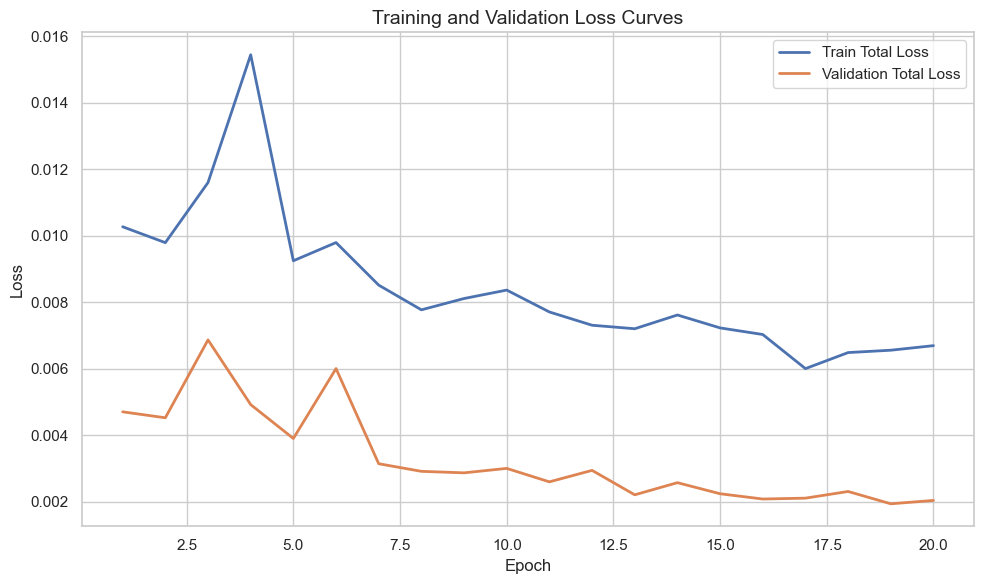

In [42]:
plot_losses(history['train_total'], history['val_total'])


## **8.2 Running Inference on the Custom Object Detection Model**

After training your **custom object detection model**, evaluate its performance by passing test images through it. Select **at least three** key evaluation metrics to assess the model’s effectiveness. Potential metrics include:

### **Key Object Detection Metrics**
- **Precision**: Measures the proportion of correctly detected objects among all predicted objects.
- **Recall**: Represents the proportion of correctly detected objects out of all actual objects present in the image.
- **F1-Score**: The harmonic mean of Precision and Recall, balancing false positives and false negatives.
- **IoU (Intersection over Union)**: Computes the ratio of overlap between the predicted bounding box and the ground truth bounding box.
- **mAP (mean Average Precision)**: A widely used metric that calculates precision at multiple recall thresholds and averages them across all object classes.

### **Additional Model Performance Metrics**
- **Inference Speed**: Measure the time taken to process a single image.
- **Number of Parameters**: Count the total trainable parameters in your model.
- **Model Size**: Evaluate the storage space required for the trained model.


```python
def test_model()
  raise NotImplementedError

def calculate_iou()
  raise NotImplementedError

def calculate_map()
  raise NotImplementedError
```

In [43]:
def calculate_iou(box1, box2):
    # box = [x_center, y_center, width, height]  (normalized 0–1)
    x1_min = box1[0] - box1[2] / 2
    y1_min = box1[1] - box1[3] / 2
    x1_max = box1[0] + box1[2] / 2
    y1_max = box1[1] + box1[3] / 2

    x2_min = box2[0] - box2[2] / 2
    y2_min = box2[1] - box2[3] / 2
    x2_max = box2[0] + box2[2] / 2
    y2_max = box2[1] + box2[3] / 2

    # intersection
    inter_xmin = max(x1_min, x2_min)
    inter_ymin = max(y1_min, y2_min)
    inter_xmax = min(x1_max, x2_max)
    inter_ymax = min(y1_max, y2_max)

    inter_area = max(0, inter_xmax - inter_xmin) * max(0, inter_ymax - inter_ymin)
    box1_area = (x1_max - x1_min) * (y1_max - y1_min)
    box2_area = (x2_max - x2_min) * (y2_max - y2_min)

    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0.0

def calculate_map(preds, targets, iou_threshold=0.5):
    correct_detections = 0
    total_predictions = len(preds)
    total_targets = len(targets)

    for pred, gt in zip(preds, targets):
        pred_cls, pred_box = pred
        gt_cls, gt_box = gt
        iou = calculate_iou(pred_box, gt_box)
        if iou >= iou_threshold and pred_cls == gt_cls:
            correct_detections += 1

    precision = correct_detections / total_predictions if total_predictions > 0 else 0
    recall = correct_detections / total_targets if total_targets > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1


def test_model(model, test_loader, device, iou_threshold=0.5):
    model.eval()
    preds = []
    targets = []
    inference_times = []

    with torch.no_grad():
        for images, labels, bboxes in tqdm(test_loader, desc='Testing'):
            images, labels, bboxes = images.to(device), labels.to(device), bboxes.to(device)

            if labels.dim() > 1:
                labels = labels[:, 0]
            if bboxes.dim() > 2:
                bboxes = bboxes[:, 0, :]

            start = time.time()
            cls_logits, pred_bboxes = model(images)
            end = time.time()
            inference_times.append(end - start)

            pred_classes = torch.argmax(cls_logits, dim=1)

            for i in range(len(images)):
                preds.append((pred_classes[i].item(), pred_bboxes[i].cpu().numpy().tolist()))
                targets.append((labels[i].item(), bboxes[i].cpu().numpy().tolist()))

    precision, recall, f1 = calculate_map(preds, targets, iou_threshold)
    avg_iou = np.mean([calculate_iou(p[1], t[1]) for p, t in zip(preds, targets)])
    avg_inference_time = np.mean(inference_times)

    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    model_size_mb = os.path.getsize("best_model.pth") / (1024 * 1024)

    print(f"\n📊 Evaluation Metrics:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Average IoU: {avg_iou:.4f}")
    print(f"Avg Inference Time per Batch: {avg_inference_time:.4f} s")
    print(f"Total Parameters: {total_params:,}")
    print(f"Trainable Parameters: {trainable_params:,}")
    print(f"Model Size: {model_size_mb:.2f} MB")

    return {
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "iou": avg_iou,
        "inference_time": avg_inference_time,
        "params": total_params,
        "trainable_params": trainable_params,
        "model_size_mb": model_size_mb
    }


In [46]:
metrics = test_model(trained_model, test_loader, device)


Testing: 100%|██████████| 7/7 [00:09<00:00,  1.41s/it]


📊 Evaluation Metrics:
Precision: 0.9700
Recall: 0.9700
F1-Score: 0.9700
Average IoU: 0.7868
Avg Inference Time per Batch: 1.0297 s
Total Parameters: 11,440,967
Trainable Parameters: 11,440,967
Model Size: 43.72 MB


## **8.3 Visualizing Model Predictions**
- Select a set of test images and display them with **predicted bounding boxes** overlaid.
- Compare predictions against the **ground truth bounding boxes** to visually assess model accuracy.
- Annotate each prediction with relevant metrics (Precision, Recall, IoU) to highlight how well the model performs.

For detailed tracking and logging, consider using **Weights and Biases (WandB)** or **TensorBoard** to visualize training progress, compare models, and gain deeper insights into your results.

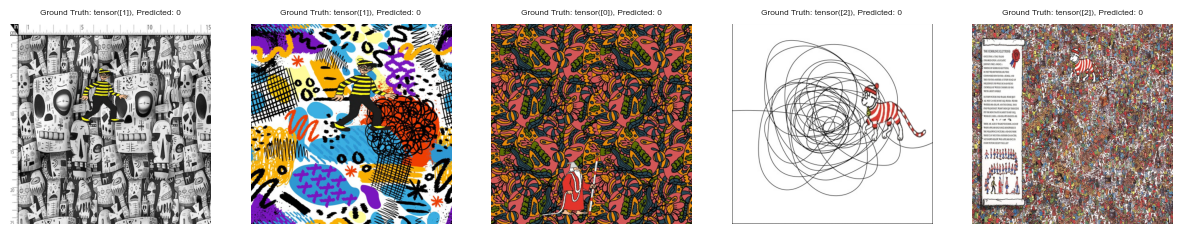

In [47]:
def visualize_predictions(model, test_dataset,num_samples=5):
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=num_samples, shuffle=True)

    images, labels, _ = next(iter(test_loader))

    device = next(model.parameters()).device
    images = images.to(device)

    with torch.no_grad():
        class_probs,_ = model(images)

    _, predicted_labels = torch.max(class_probs, 1)

    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].cpu().permute(1, 2, 0))  # Convert image to numpy format
        plt.title(f'Ground Truth: {labels[i]}, Predicted: {predicted_labels[i]}',fontsize=6)
        plt.axis('off')
        plt.tick_params(axis='both', which='both', labelsize=4)
    plt.show()

visualize_predictions(myModel, test_dataset)

## **9. Loading an Existing Object Detection Model (YOLOvX)**

You are free to select any YOLO model version available. We recommend referring to the **Ultralytics documentation** on object detection: [Ultralytics YOLO Docs](https://docs.ultralytics.com/tasks/detect/).

Training a YOLO model is straightforward and requires a properly formatted **`data.yaml`** file, which defines dataset paths and classes. Refer to the **official GitHub repository** for detailed instructions: [Ultralytics GitHub](https://github.com/ultralytics/ultralytics).

Once your dataset is prepared, you can initiate training directly from the command line using a simple command:

```bash
!yolo detect train data=datasets/data.yaml model=yolov11n.pt epochs=100 imgsz=640
```

A `data.yaml` might look something like this:
```python
with open('dataset/data.yaml', 'w') as f:
        f.write("path:  \ntrain: content/dataset/train/images \nval: content/dataset/val/images \ntest: content/dataset/test/images \n")
        f.write("nc: 3 \n")
        f.write("names:\n  0: wilma\n  1: waldo\n  2: wenda\n")
        f.write('\n')
f.close()
```

In [59]:

data_config = {
    'path': 'dataset',  # root folder
    'train': 'dataset/train/images',
    'val': 'dataset/val/images',
    'test': 'dataset/test/images',
    'nc': 3,  # number of classes
    'names': {0: 'char1', 1: 'char2', 2: 'char3'}
}

with open('dataset/data.yaml', 'w') as f:
    yaml.dump(data_config, f, default_flow_style=False)



In [69]:
model = YOLO('yolo11n.pt')



In [72]:
import os

for split in ["train", "val", "test"]:
    print(split, "→", os.path.exists(f"dataset/{split}/images"), f"({os.path.abspath(f'dataset/{split}/images')})")


train → True (E:\Programok\python\dnd\dataset\train\images)
val → True (E:\Programok\python\dnd\dataset\val\images)
test → True (E:\Programok\python\dnd\dataset\test\images)


In [1]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')
model.train(data='dataset/data.yaml', epochs=1, imgsz=640, batch=1, name='check', exist_ok=True)


New https://pypi.org/project/ultralytics/8.3.223 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.221  Python-3.12.6 torch-2.9.0+cpu CPU (AMD Ryzen 5 3600 6-Core Processor)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=check, nbs=64, nms=False, opset=None, optimi

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001BECED28A40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

## **10. Evaluating the YOLO Model**

Ensure that you **log and visualize training losses** and **evaluation metrics** throughout the training process. YOLO models typically provide verbose output by default, but you should also generate visualizations to track performance trends effectively.

In [4]:
# Evaluate on validation set
metrics = model.val()
print(metrics)

# Run inference on test images
results = model.predict(source='dataset/test/images', save=True)


Ultralytics 8.3.221  Python-3.12.6 torch-2.9.0+cpu CPU (AMD Ryzen 5 3600 6-Core Processor)
val: Fast image access  (ping: 0.00.0 ms, read: 2393.6316.6 MB/s, size: 430.9 KB)
val: Scanning E:\Programok\python\dnd\dataset\val\labels.cache... 500 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 500/500 500.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 32/32 0.8it/s 39.1s1.2ss
                   all        500        500      0.941      0.963      0.985      0.787
                 char1        167        167      0.879      0.994      0.988       0.78
                 char2        180        180      0.959          1      0.985      0.825
                 char3        153        153      0.984      0.895      0.982      0.757
Speed: 1.1ms preprocess, 62.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to E:\Programok\python\dnd\runs\detect\val2
ultralytics.utils.metrics.DetMetrics object with at

Please make sure to download your `.ipynb` file, and upload it to **Canvas** on time!

<img src="https://www.usatoday.com/gcdn/authoring/authoring-images/2023/08/25/USAT/70680172007-alertsm.png?crop=2099,1187,x0,y156" alt="1" border="0">



In [ ]:
from datetime import datetime, timedelta, timezone

deadline = datetime(2025, 11, 4, 23, 59, 0, tzinfo=timezone.utc)

def time_until_deadline():
    now = datetime.now(timezone.utc)
    remaining = deadline - now
    if remaining.total_seconds() <= 0:
        return "Time's up!"
    days = remaining.days
    hours, remainder = divmod(remaining.seconds, 3600)
    minutes, _ = divmod(remainder, 60)

    return f"{days} days, {hours} hours, {minutes} minutes"

print("Time left until submission:", time_until_deadline())

Time left until submission: 13 days, 13 hours, 48 minutes
